# Creation of a gif visualizing how K-Means works

### Simulation of Data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from scipy.spatial.distance import cdist
from IPython.display import HTML

%matplotlib inline

x1 = np.random.normal(2, 10, (50, 2))
x2 = np.random.normal(0, 10, (50, 2))
x3 = np.random.normal(-2, 10, (50, 2))

x = np.concatenate((x1,x2,x3))
y = np.concatenate(([1]*len(x1),[2]*len(x2), [3]*len(x3)))

x = (x - np.mean(x))/np.std(x)

# How many clusters?
K = 3

### Setup writer

In [14]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, bitrate=1800)

### Generate differentiable colors

In [27]:
colors = [[0,1/j,1/k,1] for j in np.arange(1,4) for k in np.arange(1,4)]
np.random.shuffle(colors)

available_colors = colors[:K]

### Create GIF

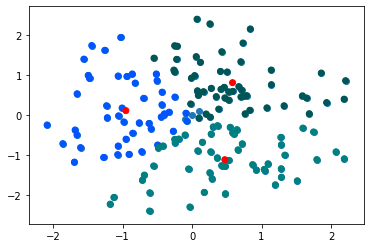

In [24]:
color_lst = np.zeros((len(x)+K, 4))
fig = plt.figure()
ax = plt.axes()

def init():
    global classes
    global scat
    
    #initialize centroids randomly
    #centroid_idx = np.random.choice(range(len(x)), K, replace=False)
    #centroids = x[centroid_idx]
    
    #fixed initial centroids for more instructive gif
    centroids = np.array([[0,0],[0.1,0.1],[-0.1,-0.1]])
    
    dist_to_center = cdist(x, centroids, 'euclidean')
    classes = np.argmin(dist_to_center, axis = 1)
    
    data_with_centroids = np.vstack((x, centroids))
    scat = ax.scatter(data_with_centroids[:,0], data_with_centroids[:,1])
    
    return scat,

def animate(args):
    global classes
    global scat
    
    #update centroids
    centroids = [np.mean(x[classes == i], axis = 0) for i in np.unique(classes)]
    
    #update classes according to centroids
    dist_to_center = cdist(x, centroids, 'euclidean')
    classes = np.argmin(dist_to_center, axis = 1)
    
    #show new centroids
    data_with_centroids = np.vstack((x,centroids))
    scat.set_offsets((np.array([data_with_centroids[:,0], data_with_centroids[:,1]]).T))
    
    #show new colors
    for i,j in enumerate(np.unique(classes)):
        color_lst[:-K][classes == j] = available_colors[i]
        color_lst[-K:] = [1,0,0,1]
    scat.set_color(color_lst)
    
    return scat,
    
anim = animation.FuncAnimation(fig, animate, init_func = init, frames=15, interval=500, blit=True, repeat = True)


#plt.show()
HTML(anim.to_html5_video())

### Save gif

In [20]:
anim.save('knearest_gif.mp4', writer=writer)